In [7]:
# import package 
#-*- coding:utf-8 -*-
import jieba
import sys
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from glob import glob
import os
import pandas as pd

In [9]:
# 把檔案名稱中以20開頭.txt結尾的檔案存進file_list裡
file_list = glob('NEWS*.txt')
type(file_list)
file_list

['NEWS1.19-2.19.txt', 'NEWS11.19-12.19.txt', 'NEWS12.19-1.19.txt']

In [12]:
# t 為儲存每一篇文章的list， ttolines為儲存文章中每一句話的list
t = []
for file in file_list:
    with open(file ,'r') as f:
        ttolines = []
        for line in f:
            ttolines.append(line)
    t.append(ttolines)

In [13]:
#定義切文章成詞組的函數，input為儲存有文章中每一句話的list和用來儲存詞組的dict，並輸出該dict
def text_cut(d, dic_vector):
    for article in d:
        seg_list = jieba.cut(article) 
        string_list = "|".join(seg_list).split('|')
        for s in string_list:
            if not (s in dic_vector.keys()):
                dic_vector[s] = 1
            else:
                dic_vector[s] += 1
    return dic_vector

In [15]:
div_vector = {}
div_vector = text_cut(t[0],div_vector)
df = pd.DataFrame(div_vector,index = [0])
#把每一篇文章中的句子切成詞組並存進DataFrame裡
for i in range(1,len(t)):
    div_vector = {}
    div_vector = text_cut(t[i],div_vector)
    temp_df = pd.DataFrame(div_vector,index=[0])
    #把不同篇文章的詞組以columns連接起來
    df = pd.concat([df,temp_df],ignore_index=True)
#把缺失值用0替代
df = df.fillna(0)
#去除標點符號(觀察表格中標點符號位置)
df_drop = df.drop(df.columns.tolist()[0:2294]+df.columns.tolist()[10392:10405],axis=1)
df_drop

D:\python\envs\keras35\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


,冒險,冠,冬季,冷,冷凝器,冷氣團,冷軋,准駁,凌厲,凌巨,...,Ｉ,Ｋ,Ｍ,Ｐ,Ｒ,Ｓ,Ｔ,Ｙ,＼,～
0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,...,0.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,33
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,2.0,0.0,3.0,0.0,3.0,0.0,2.0,0.0,19


In [16]:
#對標點符號以外詞組做TF-IDF
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(df_drop.values)  
df_tfidf = pd.DataFrame(tfidf.toarray(), columns = df_drop.columns.tolist())
#把TF-IDF後的詞組中頻率過低的詞組刪除
df_tfidf[df_tfidf>0.01].dropna(axis=1)

,到,及,可望,和,國巨,在,對,巨,已,市場,...,達,部分,都,電子,需求,％,（,）,，,；
0,0.026882,0.027979,0.018104,0.021945,0.051021,0.071869,0.032368,0.014264,0.017556,0.030174,...,0.013715,0.011521,0.015361,0.012618,0.015361,0.056507,0.078452,0.079001,0.920028,0.025785
1,0.034052,0.023715,0.020067,0.015202,0.060808,0.072361,0.019458,0.013986,0.021891,0.043173,...,0.020067,0.010337,0.015810,0.017634,0.012162,0.058983,0.062632,0.063848,0.929749,0.031012
2,0.042018,0.018346,0.014203,0.018938,0.072200,0.082260,0.021897,0.018938,0.016570,0.036100,...,0.011244,0.018346,0.020713,0.018938,0.018938,0.044977,0.059772,0.059772,0.915517,0.025447


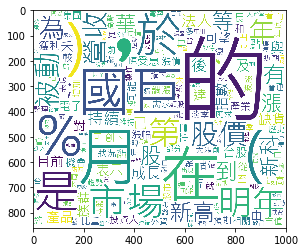

In [17]:
#再觀察一次文字雲並手動刪除不適合的資訊
from wordcloud import WordCloud
import matplotlib.pyplot as plt
tfidf_dict = df_tfidf.to_dict(orient='records')
wordcloud = WordCloud(font_path = 'msjh.ttc', background_color="white",width=1000, height=860, margin=2)
wordcloud.fit_words(tfidf_dict[1])
plt.imshow(wordcloud)
plt.show()